<a href="https://colab.research.google.com/github/jeremysb1/data_analysis_projects/blob/main/categorical_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

I am researching how engineers/developers are currently using generative AI tools.

Two considerations I have made:

1.  New and experienced coders are using these tools differently from each other,
2.  People's opinions on the usefulness and trustworthiness of current AI tools depend on their experience, job role, and what specifically they use the tools for.

A Minimum Viable Answer should be evidence to support or falsify these considerations.

Therefore:

Any conclusions should include whether or not there is a difference in the use of AI across different levels of experience.

I should communicate the factors that affect a person's opinion of, and trust in, AI tools, as supported by the survey data.

There are two kinds of output to create:

1. Evidence for whether there is a difference in the use of AI tools between developers of different experience levels;

2. Analysis of the factors that determine someone's score when assessing the usefulness and trust of AI tools.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

survey = pd.read_csv('/content/drive/MyDrive/Data Analysis Projects/Categorical Data/survey_results_public.csv')
print(survey.shape)
survey.head()

(89184, 84)


,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [2]:
survey.isnull().sum()

ResponseId                 0
Q120                       0
MainBranch                 0
Age                        0
Employment              1286
                       ...  
ProfessionalTech       47401
Industry               52410
SurveyLength            2699
SurveyEase              2630
ConvertedCompYearly    41165
Length: 84, dtype: int64

In [3]:
data_dict = pd.read_csv('/content/drive/MyDrive/Data Analysis Projects/Categorical Data/survey_results_schema.csv')
data_dict.head(10)

,qid,qname,question,force_resp,type,selector
0,QID16,S0,"<div><span style=""font-size:19px;""><strong>Hel...",False,DB,TB
1,QID12,MetaInfo,Browser Meta Info,False,Meta,Browser
2,QID310,Q310,"<div><span style=""font-size:19px;""><strong>You...",False,DB,TB
3,QID312,Q120,,True,MC,SAVR
4,QID1,S1,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
5,QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR
6,QID127,Age,What is your age? *,True,MC,MAVR
7,QID296,Employment,Which of the following best describes your cur...,False,MC,MAVR
8,QID308,RemoteWork,Which best describes your current work situation?,False,MC,SAVR
9,QID297,CodingActivities,Which of the following best describes the code...,False,MC,MAVR


In [4]:
len(set(survey.columns).intersection(set(data_dict["qname"])))

50

In [5]:
set(survey.columns) - set(data_dict["qname"])

{'AIDevHaveWorkedWith',
 'AIDevWantToWorkWith',
 'AINextNeither different nor similar',
 'AINextSomewhat different',
 'AINextSomewhat similar',
 'AINextVery different',
 'AINextVery similar',
 'AISearchHaveWorkedWith',
 'AISearchWantToWorkWith',
 'AIToolCurrently Using',
 'AIToolInterested in Using',
 'AIToolNot interested in Using',
 'ConvertedCompYearly',
 'DatabaseHaveWorkedWith',
 'DatabaseWantToWorkWith',
 'LanguageHaveWorkedWith',
 'LanguageWantToWorkWith',
 'MiscTechHaveWorkedWith',
 'MiscTechWantToWorkWith',
 'NEWCollabToolsHaveWorkedWith',
 'NEWCollabToolsWantToWorkWith',
 'OfficeStackAsyncHaveWorkedWith',
 'OfficeStackAsyncWantToWorkWith',
 'OfficeStackSyncHaveWorkedWith',
 'OfficeStackSyncWantToWorkWith',
 'OpSysPersonal use',
 'OpSysProfessional use',
 'PlatformHaveWorkedWith',
 'PlatformWantToWorkWith',
 'ResponseId',
 'ToolsTechHaveWorkedWith',
 'ToolsTechWantToWorkWith',
 'WebframeHaveWorkedWith',
 'WebframeWantToWorkWith'}

In [6]:
data_dict[data_dict["force_resp"] == True]

,qid,qname,question,force_resp,type,selector
3,QID312,Q120,,True,MC,SAVR
5,QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR
6,QID127,Age,What is your age? *,True,MC,MAVR
11,QID25,EdLevel,Which of the following best describes the high...,True,MC,SAVR
22,QID6,Country,"Where do you live? <span style=""font-weight: b...",True,MC,DL
23,QID50,Currency,Which currency do you use day-to-day? If your ...,True,MC,DL
39,QID266,NEWSOSites,Which of the following Stack Overflow sites ha...,True,MC,MAVR
46,QID314,AISelect,Do you currently use AI tools in your developm...,True,MC,SAVR
54,QID299,TBranch,"<span style=""font-size:16px;"">Would you like t...",True,MC,SAVR


In [7]:
survey[survey["EdLevel"].isnull()]

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,71,I agree,None of these,45-54 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
304,305,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
733,734,I agree,None of these,45-54 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
875,876,I agree,None of these,45-54 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88820,88821,I agree,None of these,35-44 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88828,88829,I agree,None of these,25-34 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88830,88831,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89028,89029,I agree,None of these,45-54 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
survey[survey["EdLevel"].isnull()].isnull().sum(axis=1).sort_values()

0        80
65302    80
65252    80
65037    80
64859    80
         ..
43794    80
43573    80
43567    80
43519    80
89159    80
Length: 1211, dtype: int64

In [9]:
survey = survey.dropna(subset=survey.columns[4:], how="all")

In [10]:
survey.isnull().sum().loc[lambda x: x==0]

ResponseId    0
Q120          0
MainBranch    0
Age           0
EdLevel       0
Country       0
NEWSOSites    0
AISelect      0
dtype: int64

In [11]:
survey[survey["Currency"].isnull()].isnull().sum(axis=1)

9        33
35       51
46       42
47       52
49       36
         ..
89173    16
89176    37
89180    33
89181    54
89182    30
Length: 22639, dtype: int64

## Understanding what proportion of people are using AI tools

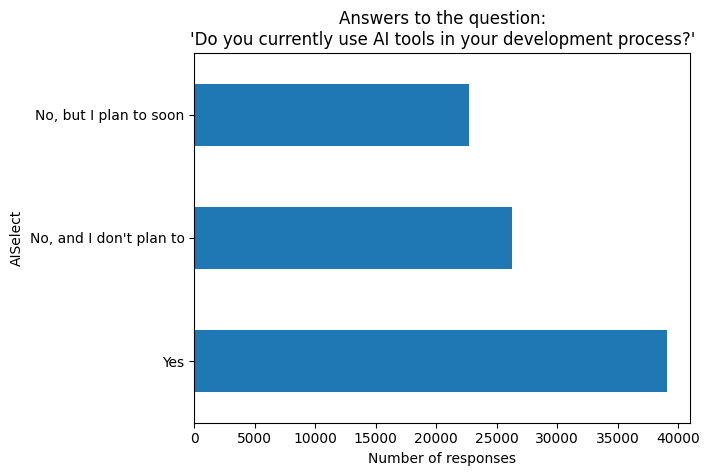

In [12]:
fig, axis = plt.subplots()

(
    survey["AISelect"]
    .value_counts(dropna=False)
    .plot
    .barh(ax=axis)
)

axis.set(title="Answers to the question:\n'Do you currently use AI tools in your development process?'",
         xlabel="Number of responses")

plt.show()